<a href="https://colab.research.google.com/github/Israt1063/1.Breast-Cancer-Classification-with-ML-LogReg-SVM-Tree-/blob/main/1_Breast_Cancer_Classification_with_ML_(LogReg%2C_SVM%2C_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
!mkdir -p ~/.kaggle
!cp /content/drive/My\ Drive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [16]:
!pip install -q kaggle


In [17]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data


Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 136MB/s]


In [18]:
!unzip breast-cancer-wisconsin-data.zip


Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [19]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [21]:
# 📌 Step 2: Load the Dataset
df = pd.read_csv('data.csv')
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
# 📌 Step 3: Data Preprocessing
# Drop the ID column and unnamed column (if exists)
df.drop(['id'], axis=1, inplace=True)
if 'Unnamed: 32' in df.columns:
    df.drop(['Unnamed: 32'], axis=1, inplace=True)

# Convert diagnosis to binary
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
# 📌 Step 4: Train Models
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)


SVC(probability=True)

In [24]:
# 📌 Step 5: Evaluate Models
models = {
    "Logistic Regression": log_model,
    "Decision Tree": tree_model,
    "SVM": svm_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n🧠 {name} Evaluation:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
        print(f"ROC-AUC: {auc:.4f}")



🧠 Logistic Regression Evaluation:
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC: 0.9974

🧠 Decision Tree Evaluation:
[[68  3]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

ROC-AUC: 0.9440

🧠 SVM Evaluation:
[[71  0]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accura

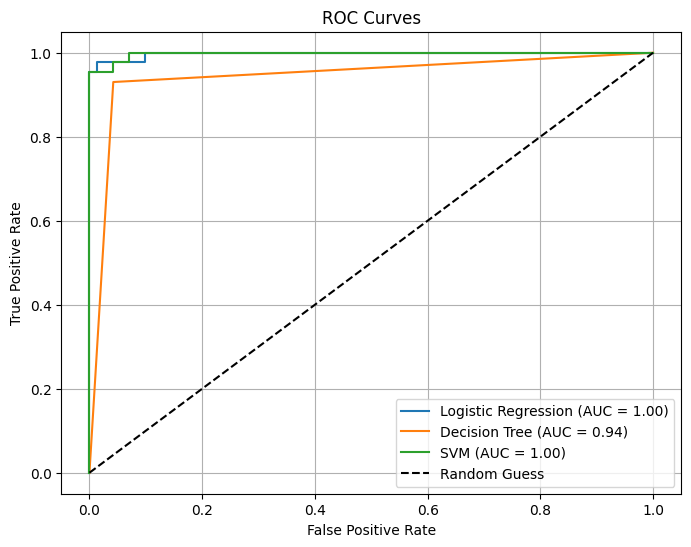

In [25]:
# 📌 Step 6: Plot ROC Curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        auc = roc_auc_score(y_test, y_score)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid()
plt.show()


| Model                   | ROC-AUC Score | Interpretation                                                                   |
| ----------------------- | ------------- | -------------------------------------------------------------------------------- |
| **Logistic Regression** | 1.00          |  Perfect classification (no false positives/negatives) — overfitting possible  |
| **Decision Tree**       | 0.94          | Very good, but slightly less stable — decision trees may overfit without pruning |
| **SVM**                 | 1.00          |  Excellent result — powerful when data is well separated                       |
| **Random Guess**        | 0.50          | Baseline — no predictive power                                                   |
